<a href="https://colab.research.google.com/github/CastleNine1325/Basic_Machine_Learning/blob/main/%ED%98%88%EC%95%A1%EC%95%94_K_%ED%8F%89%EA%B7%A0_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
blood = np.load('/content/drive/MyDrive/blood_data.npy')

https://velog.io/@coma_403/ValueError-Cannot-load-file-containing-pickled-data-when-allowpickleFalse-%EC%97%90%EB%9F%AC-%ED%95%B4%EA%B2%B0

numpy로 변환하면 np.load()를 할 수 있음.

https://supermemi.tistory.com/entry/Python-PIL-PIL-%EC%9D%B4%EB%AF%B8%EC%A7%80-Numpy-%EB%B0%B0%EC%97%B4-%EB%B3%80%ED%99%98-%EB%B0%8F-%EC%A0%80%EC%9E%A5-Imagefromarray-nparray-npasarray#google_vignette

다른 파일을 numpy파일로 변환하는 법

In [ ]:
print(blood.shape)

(200, 64, 64)


In [ ]:
import cv2
import numpy as np

image_path = "/content/drive/MyDrive/blood/Sample_1.tiff" # 이미지 파일 경로
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)      # 이미지를 흑백으로 읽어오기
image_array = np.array(image)                             # 이미지를 숫자 배열로 변환
print("이미지 배열 형태:", image_array)                   # 변환된 숫자 배열 출력

이미지 배열 형태: [[239 238 239 ... 211 210 210]
 [239 238 239 ... 212 211 210]
 [239 238 238 ... 210 212 211]
 ...
 [205 203 201 ... 202 203 204]
 [208 207 206 ... 202 204 205]
 [209 208 209 ... 207 207 207]]


1장만 미리 가져와 샘플로 변환 실행

In [ ]:
import cv2
import numpy as np
blood_image_path = '/content/drive/MyDrive/blood' # 이미지 파일 경로
blood_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)      # 이미지를 흑백으로 읽어오기
blood = np.array(blood_image)                       # 이미지를 숫자 배열로 변환
print("이미지 배열 형태:", blood.shape)

이미지 배열 형태: (64, 64)


64 x 64 크기의 이미지 배열 성공

In [ ]:
import os

blood_folder_path = '/content/drive/MyDrive/blood'            # 이미지가 있는 폴더 경로
blood_file_names = os.listdir(blood_folder_path)                    # 폴더 내의 모든 파일 목록 가져오기
blood_samples = []                                       # 이미지를 저장할 리스트 생성

for file_name in blood_file_names:                            # 폴더 내의 각 파일에 대해 숫자 배열로 변환
    image_path = os.path.join(blood_folder_path, file_name)   # 파일의 전체 경로 생성

    if file_name.endswith('.tiff'):       # 파일이 이미지인지 확인 (확장자가 .tiff인 경우에만)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # 이미지를 흑백으로 읽어오기

        if image is not None:                 # 이미지가 올바르게 읽어졌는지 확인
            blood = np.array(image)     # 이미지를 숫자 배열로 변환하여 리스트에 추가
            blood_samples.append(blood)

for i, blood in enumerate(blood_samples):
    print(f"Image {i+1} array shape:", blood.shape)    # 리스트에 저장된 이미지 배열 확인

https://luvris2.tistory.com/189

구글 코랩 드라이브 데이터 세트 마운트 하는 방법


https://velog.io/@mykirk98/Colab-%EA%B5%AC%EA%B8%80-%EB%93%9C%EB%9D%BC%EC%9D%B4%EB%B8%8C-%EB%A7%88%EC%9A%B4%ED%8A%B8

특정 폴더만 마운트 하는 방법

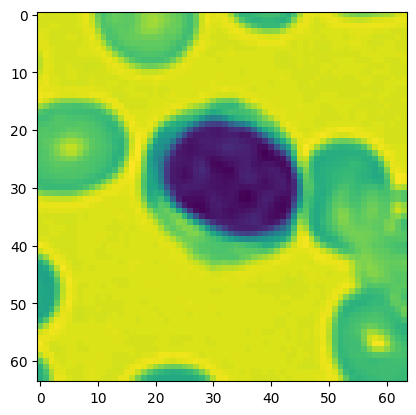

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(blood)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(blood)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
print(km.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([44,  8, 12]))


In [ ]:
def draw_blood(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/6))
  cols = n if rows < 2 else 6
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*6 + j < n:
        axs[i, j].imshow(arr[i*6 + j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()

In [ ]:
draw_blood(blood[km.labels_==0])

In [ ]:
!wget https://www.kaggle.com/datasets/akhiljethwa/blood-cancer-image-dataset -O blood.npy

In [ ]:
blood = np.load('/content/blood.npy')